In [1]:
import pandas as pd
# Read data from file 'filename.csv'
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later)
data = pd.read_csv('gcoos_2019-10-29.csv') 
# Preview the first 5 lines of the loaded data.'
data.dropna(inplace=True)
data.head()

,owner,platform,lat,lon,observationDate,depth,DO,qcFlag
0,LUMCON,LUML1,29.2533,-90.6633,2017-01-19T21:00:00Z,1.0,7.58,1111122.0
1,LUMCON,LUML1,29.2533,-90.6633,2017-01-19T21:15:00Z,1.0,7.35,1111122.0
2,LUMCON,LUML1,29.2533,-90.6633,2017-01-19T21:30:00Z,1.0,7.51,1111122.0
3,LUMCON,LUML1,29.2533,-90.6633,2017-01-19T21:45:00Z,1.0,7.38,1111122.0
4,LUMCON,LUML1,29.2533,-90.6633,2017-01-19T22:00:00Z,1.0,7.35,1111122.0


In [2]:
# Re-index by time
data = data.set_index('observationDate')
# Preview the first 5 lines of the loaded data.'
data.head()

,owner,platform,lat,lon,depth,DO,qcFlag
observationDate,,,,,,,
2017-01-19T21:00:00Z,LUMCON,LUML1,29.2533,-90.6633,1.0,7.58,1111122.0
2017-01-19T21:15:00Z,LUMCON,LUML1,29.2533,-90.6633,1.0,7.35,1111122.0
2017-01-19T21:30:00Z,LUMCON,LUML1,29.2533,-90.6633,1.0,7.51,1111122.0
2017-01-19T21:45:00Z,LUMCON,LUML1,29.2533,-90.6633,1.0,7.38,1111122.0
2017-01-19T22:00:00Z,LUMCON,LUML1,29.2533,-90.6633,1.0,7.35,1111122.0


In [3]:
# define tests
names = {
        0: 'timing/gap test',
        1: 'syntax test',
        2: 'location test',
        3: 'gross range test',
        4: 'climatology test',
        5: 'spike test',
        6: 'rate of change test',
        7: 'flatline test',
    }

In [4]:
#create new column for each test run containing the [1,2,3,4,9] flag results from that test:
for ii in range(len(data.index)):
    item = str(data['qcFlag '].values[ii])
    for index in range(len(names)):
        name = names.get(index)        
        qc_result = [value for index_i, value in enumerate(item) if index_i == index ]
        data[name] = qc_result[0]

In [5]:
data.head()

,owner,platform,lat,lon,depth,DO,qcFlag,timing/gap test,syntax test,location test,gross range test,climatology test,spike test,rate of change test,flatline test
observationDate,,,,,,,,,,,,,,,
2017-01-19T21:00:00Z,LUMCON,LUML1,29.2533,-90.6633,1.0,7.58,1111122.0,1,1,1,1,1,2,2,.
2017-01-19T21:15:00Z,LUMCON,LUML1,29.2533,-90.6633,1.0,7.35,1111122.0,1,1,1,1,1,2,2,.
2017-01-19T21:30:00Z,LUMCON,LUML1,29.2533,-90.6633,1.0,7.51,1111122.0,1,1,1,1,1,2,2,.
2017-01-19T21:45:00Z,LUMCON,LUML1,29.2533,-90.6633,1.0,7.38,1111122.0,1,1,1,1,1,2,2,.
2017-01-19T22:00:00Z,LUMCON,LUML1,29.2533,-90.6633,1.0,7.35,1111122.0,1,1,1,1,1,2,2,.


In [ ]:
def flag_design(array):
    colors_i = []
    label_i = []
    for flag in array:
        if flag == '1':
            colors_i.append('b')
            label_i.append('Pass')
        elif flag == '2':
            colors_i.append('k') 
            label_i.append('No Evaluated')
        elif flag == '3':
            colors_i.append('y')
            label_i.append('Suspect')
        elif flag == '4':
            colors_i.append('r')
            label_i.append('Fail')
        elif flag == '9':
            colors_i.append('m')
            label_i.append('Missing')
    return colors_i, label_i

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

#from bokeh.layouts import gridplot
#from bokeh.plotting import figure, show, output_file, output_notebook
#output_notebook()

In [ ]:
# Method to plot QC results using Bokeh
def plot_results(data, var_name, test_name):

    time = data.index
    obs = data[var_name]
    qc_test = data[test_name]

    qc_pass = np.ma.masked_where(qc_test != '1', obs)
    qc_suspect = np.ma.masked_where(qc_test != '3', obs)
    qc_fail = np.ma.masked_where(qc_test != '4', obs)
    qc_notrun = np.ma.masked_where(qc_test != '2', obs)

    p1 = figure(x_axis_type="datetime", title=test_name + ' : ' + var_name)
    p1.grid.grid_line_alpha=0.3
    p1.xaxis.axis_label = 'Time'
    p1.yaxis.axis_label = 'Observation Value'

    p1.line(time, obs,  legend='obs', color='#A6CEE3')
    p1.circle(time, qc_notrun, size=2, legend='qc not run', color='gray', alpha=0.2)
    p1.circle(time, qc_pass, size=4, legend='qc pass', color='green', alpha=0.5)
    p1.circle(time, qc_suspect, size=4, legend='qc suspect', color='orange', alpha=0.7)
    p1.circle(time, qc_fail, size=6, legend='qc fail', color='red', alpha=1.0)

    #output_file("qc.html", title="qc example")

    show(gridplot([[p1]], plot_width=800, plot_height=400))

In [ ]:
for index in [0]: #range(len(names)):
    col_name = data.columns[index+7]
    time = data.index
    obs = data['DO']
    qc_test = data[col_name]

    qc_pass = np.ma.masked_where(qc_test != '1', obs)
    qc_suspect = np.ma.masked_where(qc_test != '3', obs)
    qc_fail = np.ma.masked_where(qc_test != '4', obs)
    qc_notrun = np.ma.masked_where(qc_test != '2', obs)

    p1 = figure(title=col_name + ' : ' + 'DO')
    p1.grid.grid_line_alpha=0.3
    p1.xaxis.axis_label = 'Time'
    p1.yaxis.axis_label = 'Observation Value'

    p1.scatter(data.index, data['DO'],  legend='obs', color='#A6CEE3')
    #p1.circle(time, qc_notrun, size=2, legend='qc not run', color='gray', alpha=0.2)
    #p1.circle(time, qc_pass, size=4, legend='qc pass', color='green', alpha=0.5)
    #p1.circle(time, qc_suspect, size=4, legend='qc suspect', color='orange', alpha=0.7)
    #p1.circle(time, qc_fail, size=6, legend='qc fail', color='red', alpha=1.0)
    #plt.subplot(2, 4, index+1)
    #plot_results(data, 'DO', col_name)
    show(gridplot([[p1]], plot_width=800, plot_height=400))

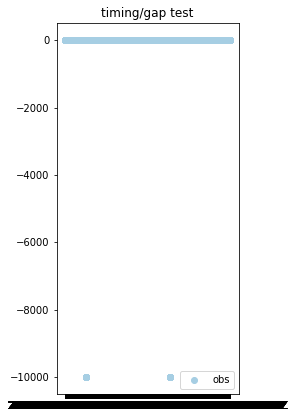

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

for index in [0]:#range(len(names)):
    col_name = data.columns[index+7]
    #colors_i, label_i = flag_design(data[col_name].values)
    #label_i = np.unique(label_i)
    
    qc_test = data[col_name]

    qc_pass = np.ma.masked_where(qc_test != '1', data['DO'])
    qc_suspect = np.ma.masked_where(qc_test != '3', data['DO'])
    qc_fail = np.ma.masked_where(qc_test != '4', data['DO'])
    qc_notrun = np.ma.masked_where(qc_test != '2', data['DO'])
    
    plt.subplot(2, 4, index+1)
    #plt.scatter(data.index,data['DO'], color=colors_i, label=label_i)
    plt.scatter(data.index,data['DO'], color='#A6CEE3', label='obs')
    p1.circle(time, qc_notrun, size=2, legend='qc not run', color='gray', alpha=0.2)
    plt.title(data.columns[index+7])
    plt.legend()

# END